In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
prices = pd.read_csv('data/dataset/usdcad.csv')

In [133]:
prices.DATE = pd.to_datetime(prices.DATE)
prices.set_index('DATE', inplace=True)

In [134]:
rendements = np.log(prices / prices.shift(1))

In [135]:
rendements

,DEXCAUS
DATE,
1998-02-02,NaN
1998-02-03,-0.001171
1998-02-04,-0.002829
1998-02-05,-0.005752
1998-02-06,-0.007184
...,...
2022-10-24,0.002265
2022-10-25,-0.006442
2022-10-26,-0.004785


In [136]:
nombreDeJoursPourVolImpl = 14
rendements['realizedVariance'] = np.nan
rendements['jump'] = np.nan
rendements['bipowerVariance'] = np.nan
i = 0
while i+nombreDeJoursPourVolImpl < len(rendements.index):
    rendementsNjours = rendements.iloc[i:(nombreDeJoursPourVolImpl+i), :]['DEXCAUS']
    bipowerVariation = np.pi / 2 * np.sum(abs(rendementsNjours * rendementsNjours.shift(1)).dropna())
    realizedVariance = np.sum(rendementsNjours**2)

    rendements['bipowerVariance'].iloc[nombreDeJoursPourVolImpl+i] = bipowerVariation
    rendements['realizedVariance'].iloc[nombreDeJoursPourVolImpl+i] = realizedVariance
    rendements['jump'].iloc[nombreDeJoursPourVolImpl+i] = max(realizedVariance - bipowerVariation, 0)
    i+=1


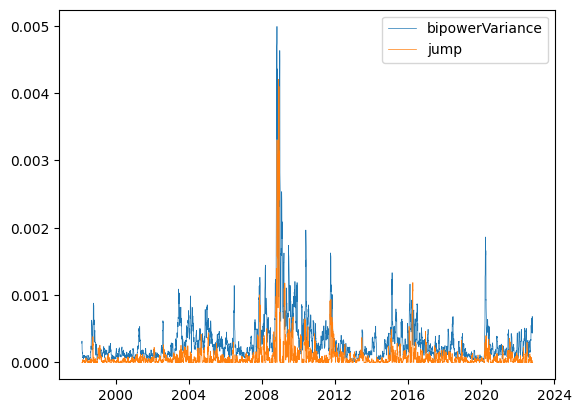

In [137]:
plt.plot(rendements.index, rendements['bipowerVariance'], label='bipowerVariance', linewidth=0.5)
plt.plot(rendements.index, rendements['jump'], label='jump', linewidth=0.5)

plt.legend()
plt.show()